# Introduction: Spotify Song Genre Classification

## Problem Description:
This Python notebook presents a comprehensive solution for automating the loan approval process using machine learning techniques. The notebook employs a dataset containing historical loan data to train and evaluate a predictive model, aiming to streamline the decision-making process for loan approval.

# Data description
The data is provided by [Spotify](https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset/data)

## Data Exploration & pre-processing: 
The notebook begins with a thorough exploration of the dataset, identifying key features and potential challenges. It covers data cleaning, handling missing values, and encoding categorical variables to prepare the data for model training.



## Baseline columns
| Column Name       | Description                                                                                                      | Data Type  |
|-------------------|------------------------------------------------------------------------------------------------------------------|------------|
| artists           | The name(s) of the artist(s) associated with the track.                                                           | String     |
| album_name        | The name of the album that the track belongs to.                                                                  | String     |
| track_name        | The name of the track.                                                                                            | String     |
| popularity        | The popularity score of the track on Spotify, ranging from 0 to 100.                                              | Integer    |
| duration_ms       | The duration of the track in milliseconds.                                                                       | Integer    |
| explicit          | A boolean value indicating whether the track contains explicit content.                                          | Boolean    |
| danceability      | A score ranging from 0 to 1 that represents how suitable a track is for dancing based on various musical elements. | Float      |
| energy            | A measure of the intensity and activity of a track, ranging from 0 to 1.                                           | Float      |
| key               | The key of the track represented by an integer value.                                                             | Integer    |
| loudness          | The loudness of the track in decibels (dB).                                                                       | Float      |
| mode              | The tonal mode of the track, represented by an integer value (0 for minor, 1 for major).                           | Integer    |
| speechiness       | A score ranging from 0 to 1 that represents the presence of spoken words in a track.                               | Float      |
| acousticness      | A score ranging from 0 to 1 that represents the extent to which a track possesses an acoustic quality.            | Float      |
| instrumentalness  | A score ranging from 0 to 1 that represents the likelihood of a track being instrumental.                         | Float      |
| liveness          | A score ranging from 0 to 1 that represents the presence of an audience during the recording or performance.     | Float      |
| valence           | A score ranging from 0 to 1 that represents the musical positiveness conveyed by a track.                         | Float      |
| tempo             | The tempo of the track in beats per minute (BPM).                                                                 | Float      |
| time_signature    | The number of beats within each bar of the track.                                                                 | Integer    |
| track_genre       | The genre of the track.                                                                                          | String     |


In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold


In [428]:
df = pd.read_csv('./data/spotify-data.csv')

# Dropping unnecessary columns
df.drop(['0', 'track_id'], axis=1, inplace=True)
# ??
df.dropna(inplace=True)

print("shape", df.shape)
# print(df.describe())

# Preprocessing artists column
df['artists'] = df['artists'].apply(lambda x: x.split(';'))
print(df['track_genre'].unique())
genres = ['pop', 'salsa', 'club', 'disco', 'children', 'funk', 'rock', 'soul', 'turkish', 'sleep']
df = df[df.track_genre.isin(genres)]
print(df['track_genre'].unique())
print(df.shape)

shape (113999, 19)
['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba

## Exploratory Data Analysis (EDA): 
Here we will provide insights into the distribution of key variables, relationships between features, and an understanding of the data patterns. Visualizations aid in uncovering trends that contribute to the decision-making process.

Feature Engineering: The notebook implements feature engineering techniques to enhance the predictive power of the model. This involves creating new features, transforming existing ones, and selecting relevant variables to improve the model's ability to capture underlying patterns.

Model Selection: Multiple machine learning algorithms are explored for Spotify Genre prediction, including but not limited to ?? 
logistic regression, decision trees, random forests, and support vector machines. The notebook includes a comparative analysis of their performance metrics, helping users choose the most suitable model for their specific use case.

Model Training and Evaluation: The selected model is trained on the preprocessed dataset, and its performance is evaluated using various metrics such as accuracy, precision, recall, and F1 score. The notebook emphasizes the importance of choosing an evaluation metric that aligns with the business goals of the loan approval system.

Hyperparameter Tuning: To optimize the model's performance, the notebook incorporates hyperparameter tuning techniques, fine-tuning the model for better accuracy and robustness.

Deployment Considerations: The notebook concludes with a discussion on deploying the trained model into a production environment. It provides insights into model deployment options, considerations for scalability, and integration with existing loan approval systems.

By leveraging this Python notebook, users can seamlessly integrate an automated loan approval prediction model into their financial systems, significantly enhancing efficiency and reducing the time and resources required for manual decision-making.


In [429]:
genres = df['track_genre'].value_counts()

# We can see that almost all the genres have at lease 999 songs and at most 1000 songs, which means there is no imbalance in the dataset.
print(min(genres.values))
print(max(genres.values))

# Check for null values in all columns
df.isna().sum()

1000
1000


artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

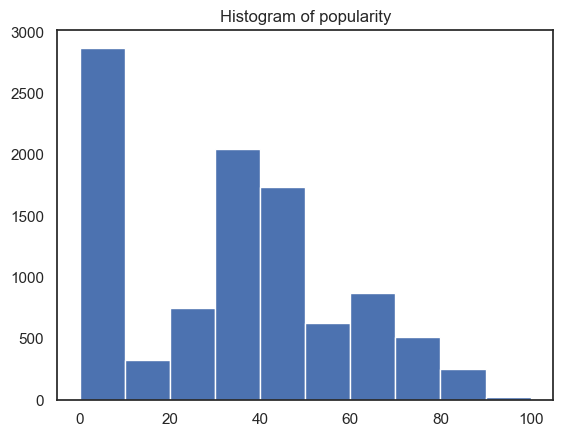

count    10000.000000
mean        32.443600
std         24.807744
min          0.000000
25%          1.000000
50%         34.000000
75%         47.000000
max        100.000000
Name: popularity, dtype: float64


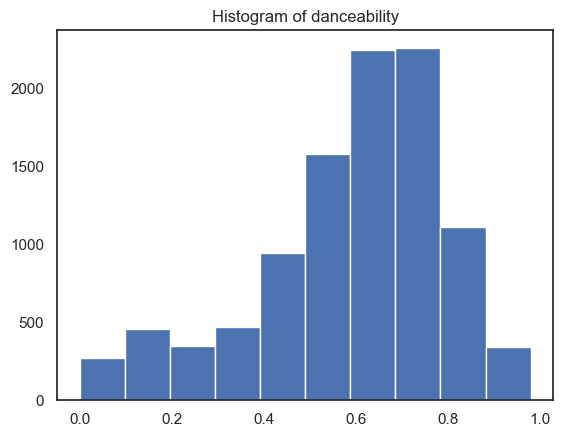

count    10000.000000
mean         0.590115
std          0.204318
min          0.000000
25%          0.492000
50%          0.630000
75%          0.732000
max          0.979000
Name: danceability, dtype: float64


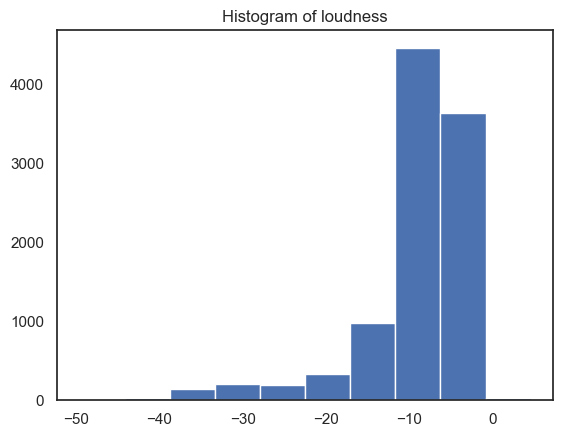

count    10000.000000
mean        -9.147744
std          6.462095
min        -49.531000
25%        -10.273000
50%         -7.374000
75%         -5.417000
max          4.532000
Name: loudness, dtype: float64


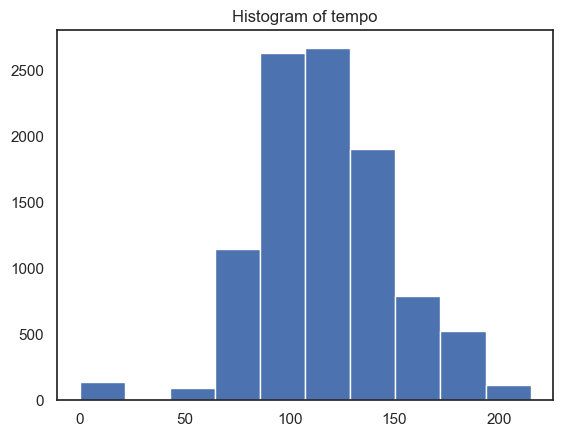

count    10000.000000
mean       117.315240
std         32.695135
min          0.000000
25%         95.030000
50%        116.174500
75%        135.832000
max        214.864000
Name: tempo, dtype: float64


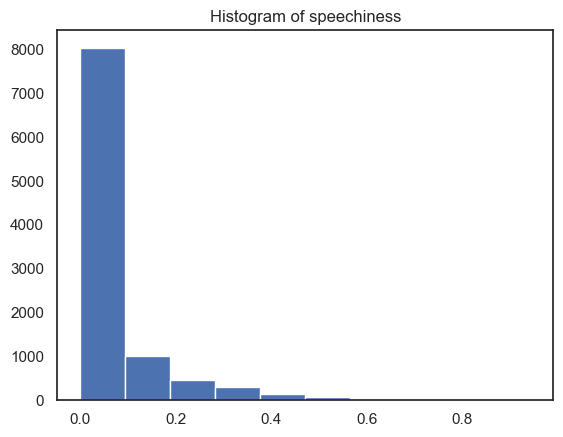

count    10000.000000
mean         0.080596
std          0.092375
min          0.000000
25%          0.035600
50%          0.046700
75%          0.076200
max          0.943000
Name: speechiness, dtype: float64


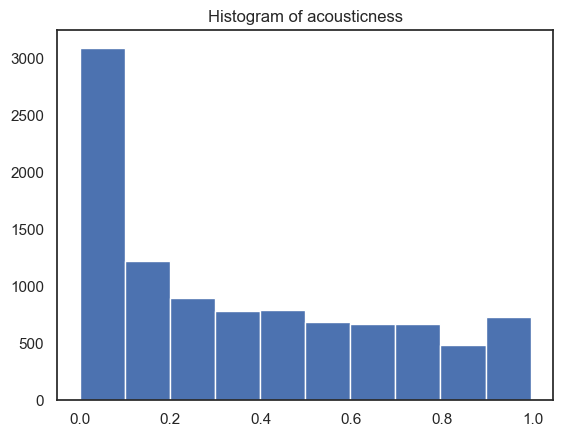

count    10000.000000
mean         0.352606
std          0.310211
min          0.000000
25%          0.063000
50%          0.277000
75%          0.603000
max          0.996000
Name: acousticness, dtype: float64


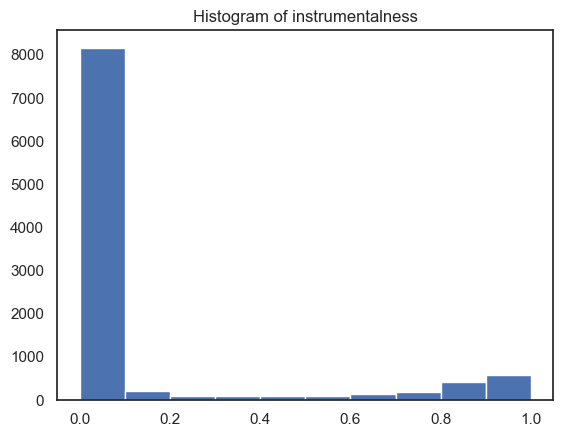

count    10000.000000
mean         0.131246
std          0.296356
min          0.000000
25%          0.000000
50%          0.000013
75%          0.007217
max          1.000000
Name: instrumentalness, dtype: float64


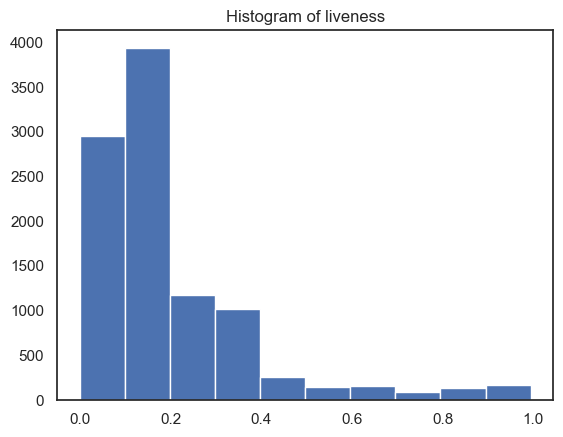

count    10000.000000
mean         0.199009
std          0.181865
min          0.000000
25%          0.092900
50%          0.124000
75%          0.248000
max          0.994000
Name: liveness, dtype: float64


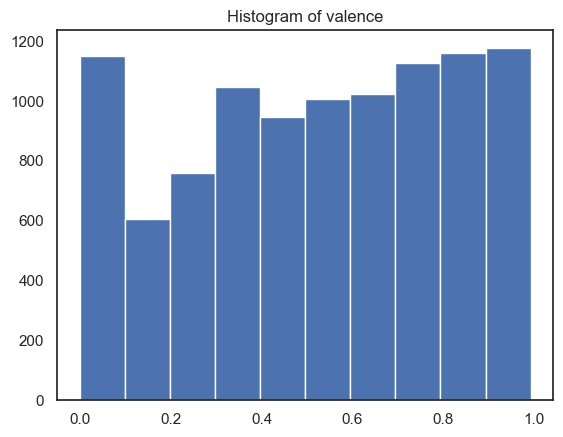

count    10000.000000
mean         0.523668
std          0.292473
min          0.000000
25%          0.295000
50%          0.546000
75%          0.780250
max          0.992000
Name: valence, dtype: float64


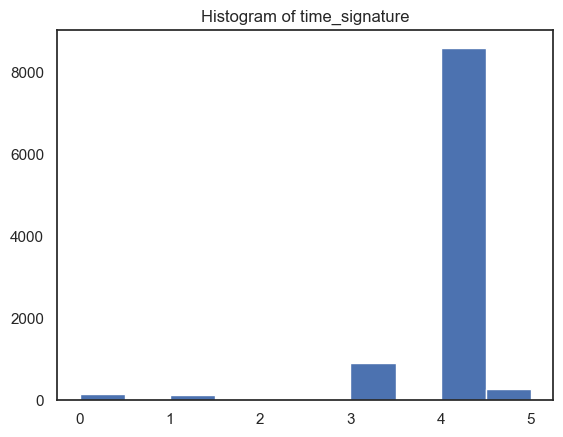

count    10000.000000
mean         3.848000
std          0.643224
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: time_signature, dtype: float64


In [430]:
numerical_columns = ['popularity', 'danceability', 'loudness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'time_signature']
categorical_columns = ['track_genre', 'explicit', 'mode']
for col in numerical_columns:
    column_data = df[col]
    _, ax = plt.subplots()
    ax.set_title(f'Histogram of {col}')
    
    plt.hist(column_data)
    plt.show()
    print(column_data.describe())


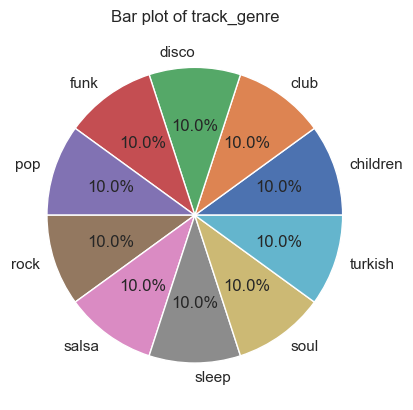

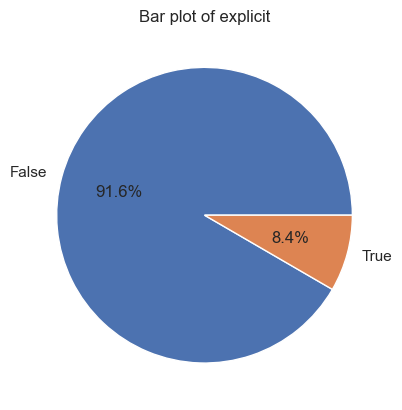

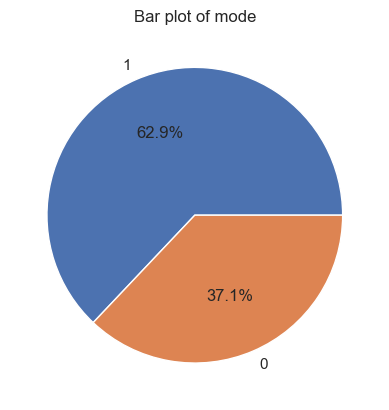

In [431]:
for col in categorical_columns:
    column_data = df[col]
    fig, ax = plt.subplots()
    ax.set_title(f'Bar plot of {col}')
    ax.pie(column_data.value_counts(), labels=column_data.value_counts().index, autopct='%1.1f%%')
    plt.show()

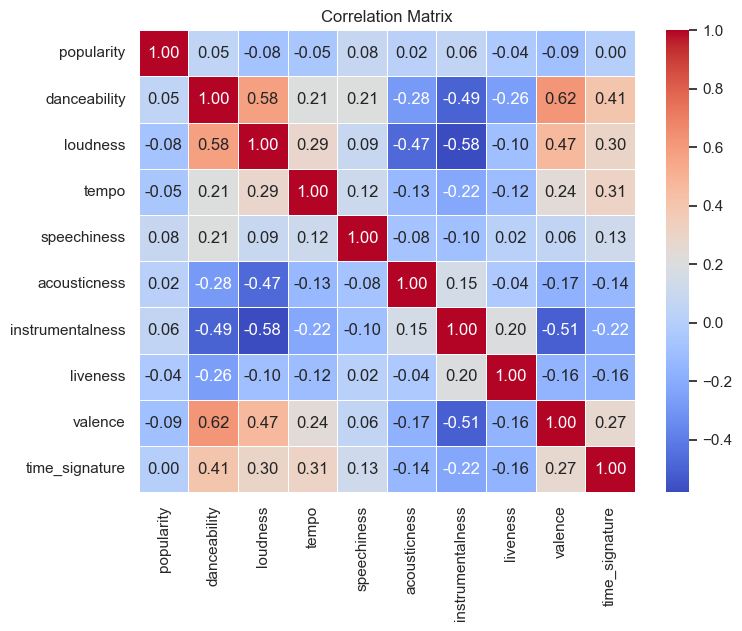

In [432]:
correlation_matrix = df[numerical_columns].corr()

# Use seaborn for a more visually appealing heatmap
sns.set(style="white")

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [433]:
# Doing one hot encoding before splitting the data to avoid getting 
# different number of columns in train and test data
dummy_data = pd.get_dummies(df, columns=['track_genre'], prefix=['track_genre'])
df = pd.concat([df, dummy_data], axis=1)

In [434]:
ktrain, test = train_test_split(df, test_size=0.2)

## Feature selection & engineering

In [435]:
# Dropping constant values and features with low variance
selector = VarianceThreshold(0.015)
print(df[numerical_columns].var())
selector.fit(df[numerical_columns])
dropped_columns = []
for index, col in enumerate(numerical_columns):
    if(not selector.get_support()[index]):
        dropped_columns.append(col)

print("Columns to be dropped:", dropped_columns)
numerical_columns = [col for col in numerical_columns if col not in dropped_columns]
df.drop(dropped_columns, axis=1, inplace=True)
# There are not variables with high correlation in the dataset to be dropped

popularity           615.424161
popularity           615.424161
danceability           0.041746
danceability           0.041746
loudness              41.758677
loudness              41.758677
tempo               1068.971827
tempo               1068.971827
speechiness            0.008533
speechiness            0.008533
acousticness           0.096231
acousticness           0.096231
instrumentalness       0.087827
instrumentalness       0.087827
liveness               0.033075
liveness               0.033075
valence                0.085541
valence                0.085541
time_signature         0.413737
time_signature         0.413737
dtype: float64
Columns to be dropped: ['valence', 'time_signature']


# Base model

In [459]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df[numerical_columns], df['track_genre'], test_size=0.25, random_state=1) # 70% training and 30% test
best_score = 0
best_split_leaf = (0, 0)

# Run a for loop over range(2,50) for finding the best split and leaf hyperparameter values.
clf = DecisionTreeClassifier(min_samples_split=23, min_samples_leaf=11)  
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print("F1 score", f1_score)

F1 score 0.608440665540483


In [460]:
# scores = cross_val_score(clf, df[numerical_columns], df['track_genre'], cv=10)
# print(scores)
# print(scores.mean())

[0.33  0.395 0.503 0.532 0.573 0.611 0.611 0.606 0.599 0.524]
0.5284


In [462]:
print(clf.tree_.max_depth) # ~20
print(clf.tree_.node_count) # ~1k 


20
871
